## 期中考
https://www.kaggle.com/c/3rd-ml100marathon-midterm

#### 機器學習百日馬拉松期中考 - Enron Fraud Dataset 安隆公司詐欺案資料集
安隆公司曾是一間能源公司，2001 年破產前是世界上最大的電力、天然氣及電信公司之一。擁有上千億資產的公司於 2002 年竟然在短短幾周內宣告破產，才揭露其財報在多年以來均是造假的醜聞。在本資料集中你將會扮演偵探的角色，透過高層經理人內部的 mail 來往的情報以及薪資、股票等財務特徵，訓練出一個機器學習模型來幫忙你找到可疑的詐欺犯罪者是誰! 我們已經先幫你找到幾位犯罪者 (Person-of-Interest, poi) 與清白的員工，請利用這些訓練資料來訓練屬於自己的詐欺犯機器學習模型吧!

#### 特徵說明
有關財務的特徵: ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (單位皆為美元)。更詳細的特徵說明請參考 enron61702insiderpay.pdf 的最後一頁(請至Data頁面參考該PDF檔)

有關 email 的特徵: ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] (除了 email_address，其餘皆為次數)

嫌疑人的標記，也就是我們常用的 **y**。POI label: [‘poi’] (boolean, represented as integer)

我們也建議你對既有特徵進行一些特徵工程如 rescale, transform ，也試著發揮想像力與創意，建立一些可以幫助找到嫌疑犯的特徵，增進模型的預測能力，

#### 關鍵問題
如果你是第一次實作機器學習專案，一開始可能會有些迷惘，不曉得該從何著手，我們提供了一系列的問題，這些都是一個機器學習專案中必須要回答的問題，可以試著從這些問題開始！

#### 專案結束後你可以學會
- 如何處理存在各種缺陷的真實資料
- 使用 val/test data 來了解機器學習模型的訓練情形
- 使用適當的評估函數了解預測結果
- 應用適當的特徵工程提升模型的準確率
- 調整機器學習模型的超參數來提升準確率
- 清楚的說明文件讓別人了解你的成果


## 載入檔案

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
dir_data = "."
f_app_train = os.path.join(dir_data, 'train_data.csv')
f_app_test = os.path.join(dir_data, 'test_features.csv')

app_train = pd.read_csv(f_app_train)
app_tset = pd.read_csv(f_app_features)

In [40]:
print("app_train shape: ", app_train.shape, app_train.columns)
print("app_features shape: ", app_features.shape, app_tset.columns)
print(set(app_train.columns) - set(app_tset.columns))

app_train shape:  (113, 22) Index(['name', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'poi',
       'restricted_stock', 'restricted_stock_deferred', 'salary',
       'shared_receipt_with_poi', 'to_messages', 'total_payments',
       'total_stock_value'],
      dtype='object')
app_features shape:  (33, 21) Index(['name', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'restricted_stock',
       'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
       'to_messages', 'total_payments', 'total_stock_value'],
      dtype='object')
{'poi'}


In [41]:
train_Y = app_train['poi']
app_train = app_train.drop(['poi'], axis=1)
train_index = app_train.shape[0]
df = pd.concat([app_train, app_tset] )
names = df['name']
print("df shape", df.shape)
df.head()

df shape (146, 21)


,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [42]:
df_dtyps = df.dtypes.reset_index()
df_dtyps.columns = ['count', 'type']
df_dtyps = df_dtyps.groupby('type').aggregate('count').reset_index()
df_dtyps

,type,count
0,float64,19
1,object,2


In [43]:
float_features = []
object_features = []
for dtype, column in zip(df.dtypes, df.columns):
    if dtype == 'float64':
        float_features.append(column)
    elif dtype == 'object':
        object_features.append(column)

print("{} float_features: {}".format(len(float_features), float_features))
print("{} object_features: {}".format(len(object_features), object_features))

19 float_features: ['bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances', 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']
2 object_features: ['name', 'email_address']


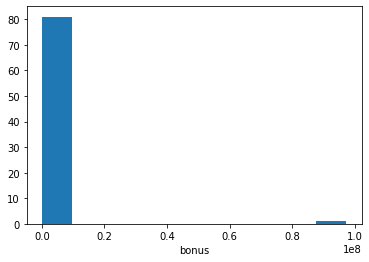

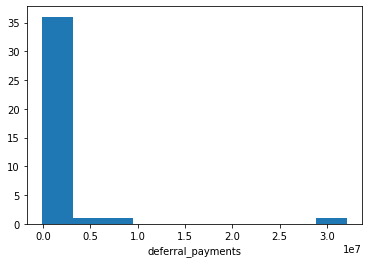

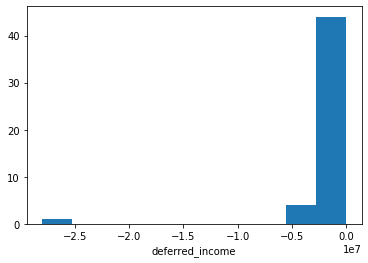

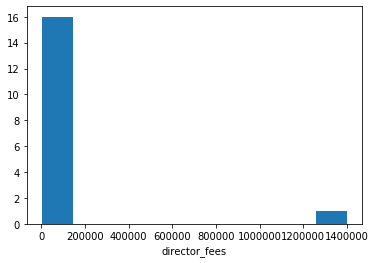

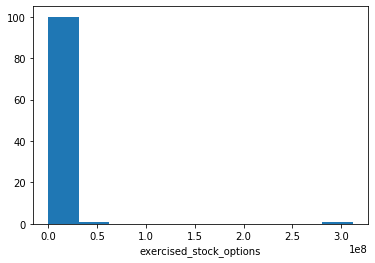

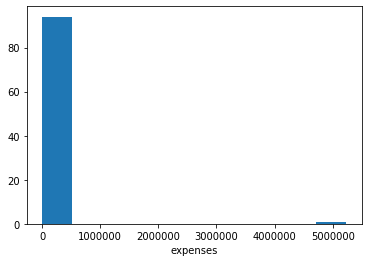

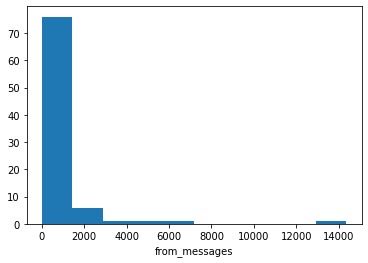

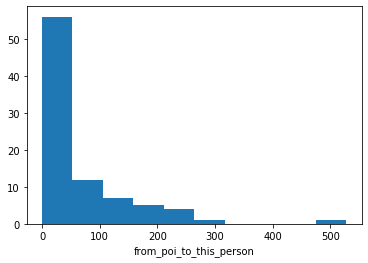

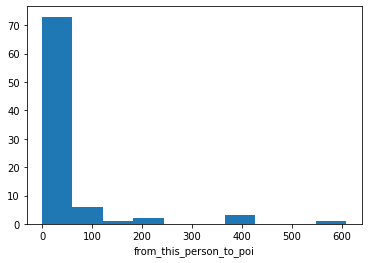

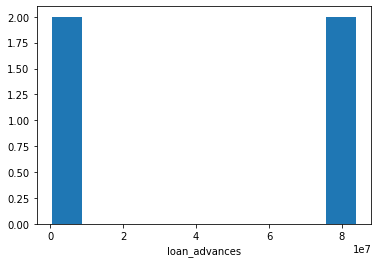

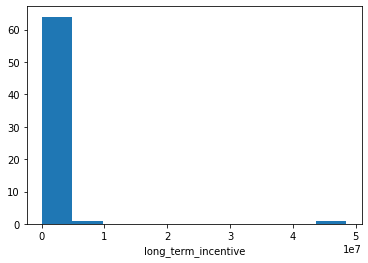

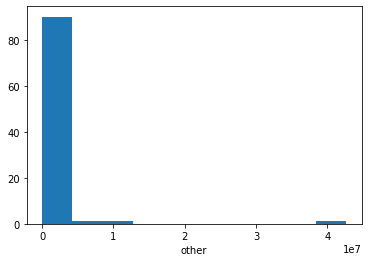

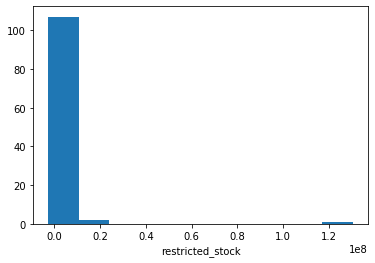

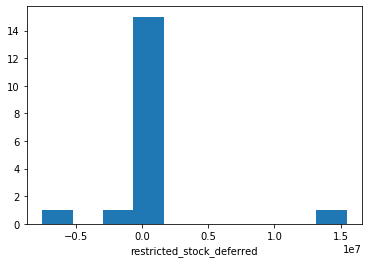

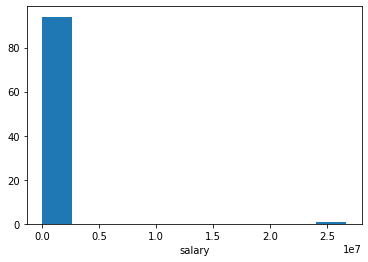

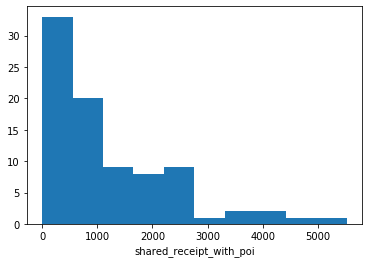

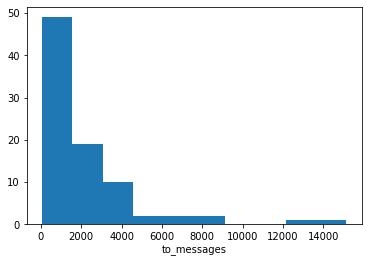

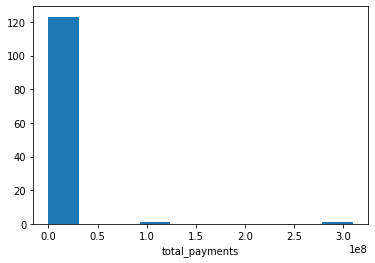

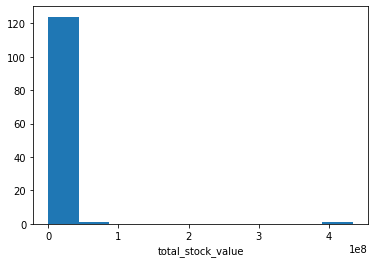

In [53]:
for col in float_features:
    plt.hist(df[col])
    plt.xlabel(col)
    plt.show()

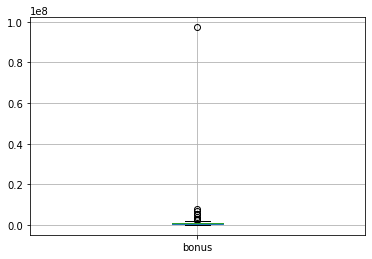

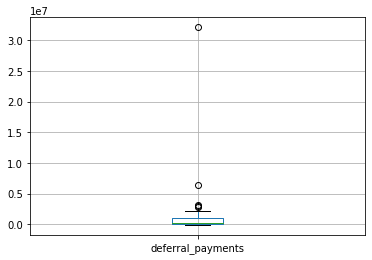

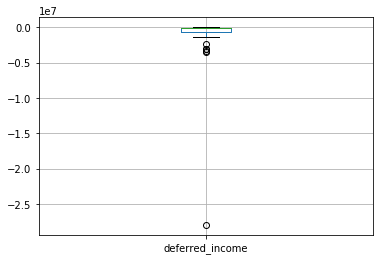

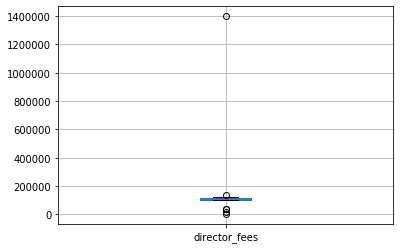

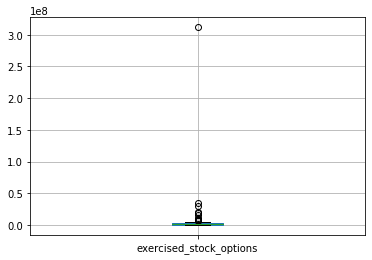

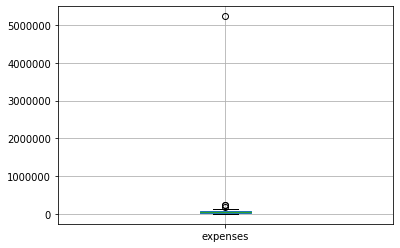

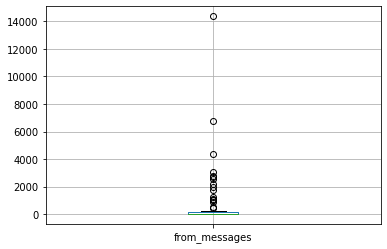

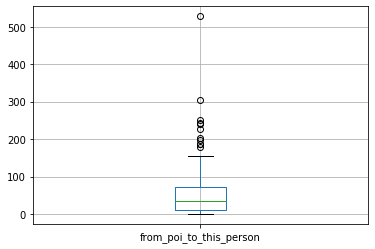

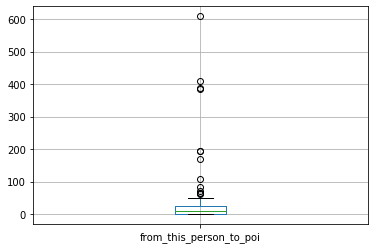

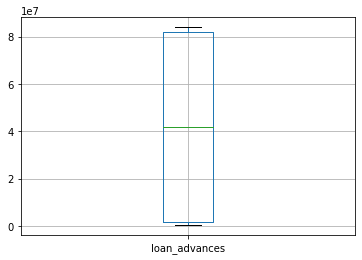

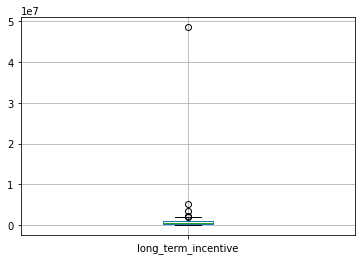

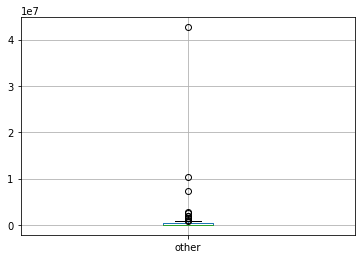

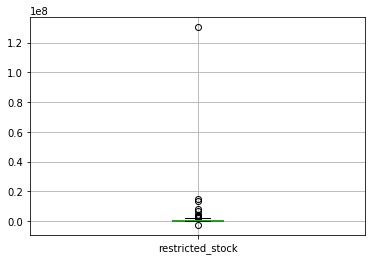

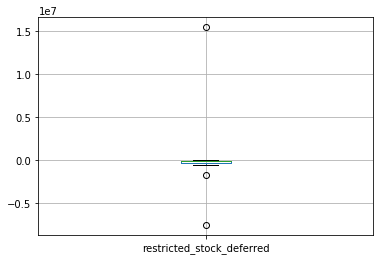

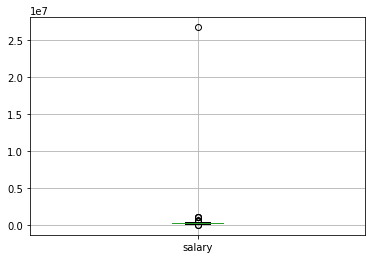

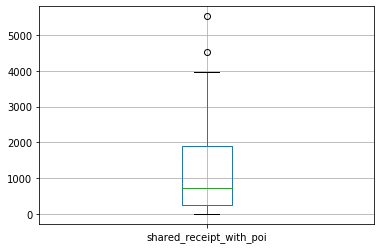

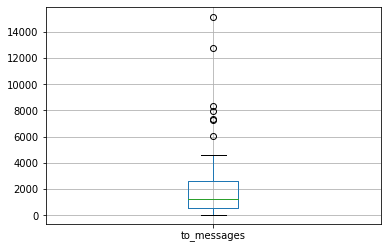

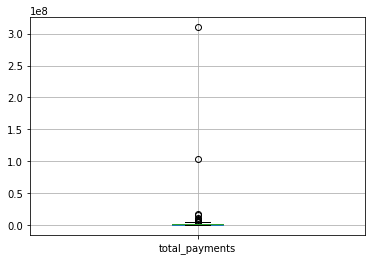

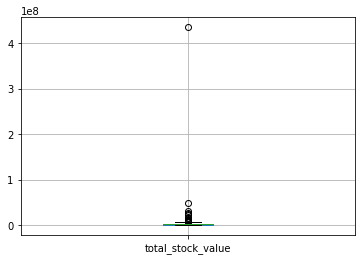

In [55]:
for col in float_features:
    df.boxplot(col)
    plt.show()